


*  Sem dropout, zoom em 0.2 e com 100 épocas: 82,37%
*   Dropout 0.5, zoom 0.4, 150 epocas: 81%


*   Mais camadas adicionadas, convolução, pooling e densa:
*  





In [34]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab import drive
from google.colab.patches import cv2_imshow
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [35]:
!pip install tensorflow

In [36]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
dados_treinamento = ImageDataGenerator(rescale=1./255, horizontal_flip=True,rotation_range = 32, zoom_range = 0.2)

In [38]:
dataset_treinamento = dados_treinamento.flow_from_directory('/content/drive/MyDrive/Projeto Paineis Solares SBIC/Colab com imagens completas/Paineis_Solares_v1 com CNN/Placas_solares_completas/train_set', target_size = (64,64), batch_size = 10, class_mode = 'categorical', shuffle = True)

Found 2670 images belonging to 2 classes.


In [39]:
dataset_treinamento.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [40]:
dataset_treinamento.class_indices

{'Placa_Defeituosa': 0, 'Placa_Limpa': 1}

In [41]:
dados_teste = ImageDataGenerator(rescale=1./255)
dataset_teste = dados_teste.flow_from_directory('/content/drive/MyDrive/Projeto Paineis Solares SBIC/Colab com imagens completas/Paineis_Solares_v1 com CNN/Placas_solares_completas/test_set', target_size = (64,64), batch_size = 1, class_mode = 'categorical', shuffle = False)

Found 777 images belonging to 2 classes.


In [42]:
rede_neural = Sequential()

rede_neural.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape=(64,64,3)))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
rede_neural.add(MaxPool2D(pool_size=(2,2)))


rede_neural.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
rede_neural.add(MaxPool2D(pool_size=(2,2)))


rede_neural.add(Flatten())

#6*6*32=1152
#(1152+2)/2=577
rede_neural.summary()

rede_neural.add(Dense(units=577, activation = 'relu'))
#rede_neural.add(Dropout(0.5))
rede_neural.add(Dense(units=577, activation = 'relu'))



rede_neural.add(Dense(units=2, activation = 'softmax'))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 32)         

In [43]:
rede_neural.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [44]:
epocas = rede_neural.fit(dataset_treinamento, epochs = 150)

Epoch 1/150
267/267 [==============================] - 107s 389ms/step - loss: 0.6578 - accuracy: 0.6172
Epoch 2/150
267/267 [==============================] - 88s 330ms/step - loss: 0.5938 - accuracy: 0.6970
Epoch 3/150
267/267 [==============================] - 89s 334ms/step - loss: 0.5686 - accuracy: 0.7127
Epoch 4/150
267/267 [==============================] - 89s 333ms/step - loss: 0.5523 - accuracy: 0.7116
Epoch 5/150
267/267 [==============================] - 88s 330ms/step - loss: 0.5392 - accuracy: 0.7322
Epoch 6/150
267/267 [==============================] - 93s 347ms/step - loss: 0.5199 - accuracy: 0.7528
Epoch 7/150
267/267 [==============================] - 87s 325ms/step - loss: 0.5096 - accuracy: 0.7468
Epoch 8/150
267/267 [==============================] - 89s 332ms/step - loss: 0.4978 - accuracy: 0.7655
Epoch 9/150
267/267 [==============================] - 89s 334ms/step - loss: 0.4933 - accuracy: 0.7573
Epoch 10/150
267/267 [==============================] - 88s 329

In [45]:
previsoes = rede_neural.predict(dataset_teste)

777/777 [==============================] - 319s 411ms/step


In [46]:
previsoes

array([[8.9977282e-01, 1.0022721e-01],
       [9.9999130e-01, 8.7120816e-06],
       [9.9926215e-01, 7.3784258e-04],
       ...,
       [1.7241073e-05, 9.9998271e-01],
       [1.5926700e-08, 1.0000000e+00],
       [1.7530108e-07, 9.9999988e-01]], dtype=float32)

In [47]:
previsoes = np.argmax(previsoes, axis=1)

In [48]:
from sklearn.metrics import accuracy_score

accuracy_score(dataset_teste.classes, previsoes)

0.8507078507078507

In [49]:
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset_teste.classes, previsoes)
cm

array([[346,  75],
       [ 41, 315]])

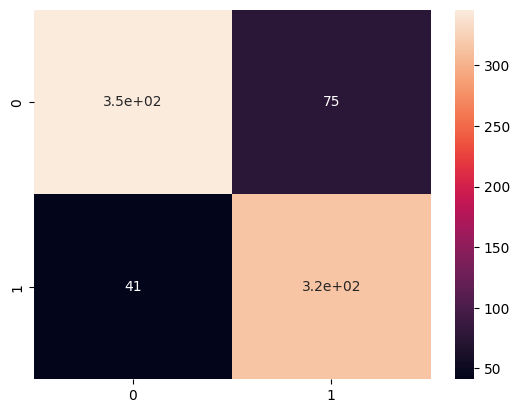

In [51]:
sns.heatmap(cm, annot=True);

In [52]:
from sklearn.metrics import classification_report
print(classification_report(dataset_teste.classes, previsoes))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86       421
           1       0.81      0.88      0.84       356

    accuracy                           0.85       777
   macro avg       0.85      0.85      0.85       777
weighted avg       0.85      0.85      0.85       777



In [1]:
model_json = rede_neural.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)

NameError: ignored

In [ ]:
from keras.models import save_model
network_saved = save_model(rede_neural, '/content/drive/MyDrive/Projeto Paineis Solares SBIC/Colab com imagens completas')